In [1]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#######

# v range
n = 100
v = linspace(0.1,850.0,n)
day = 67.0

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta

# Load shards
dat = loadtxt('../shards.txt', delimiter=',', usecols=arange(0,10))
names = loadtxt('../shards.txt', delimiter=',', usecols=10,dtype='str')
velocities = dat[:,0:3]
dispersions = dat[:,6:9]
MAD = dat[:,3:6]
pops = dat[:,9]/sum(dat[:,9])

# Speed distributions
fv_Iso = SpeedDist_Isotropic(v,day) # Round halo
fv_Iso_gf = SpeedDist_Isotropic(v,day,GravFocus=True)


nshards = shape(dat)[0]
fv = zeros(shape=(nshards,n))
fv_gf = zeros(shape=(nshards,n))
print 'Shards              velocities (vx,vy,vz) | dispersions (sig_x,sig_y,sig_z): | population'
for i in range(0,nshards):
    v_s = velocities[i,:]
    sig_s = dispersions[i,:]
    fv[i,:] = pops[i]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s)
    fv_gf[i,:] = pops[i]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,GravFocus=True)
    print '{:3d}{:9s}{:7s}{:7.2f}{:7.2f}{:7.2f}{:14s}{:7.2f}{:7.2f}{:7.2f}{:10s}{:3d}'.format(i+1,': '+names[i],'V_str = ',v_s[0],v_s[1],v_s[2],' |  sig_str = ',sig_s[0],sig_s[1],sig_s[2],' |  pop = ',int(pops[i]*sum(dat[:,9])))


Shards              velocities (vx,vy,vz) | dispersions (sig_x,sig_y,sig_z): | population
  1: S1     V_str =   -8.60-286.70 -67.90 |  sig_str =  115.30  49.90  60.00 |  pop =  34
  2: Rg1    V_str =   54.10-393.80  68.30 |  sig_str =  147.20  45.70 149.40 |  pop =  20
  3: Rg2    V_str =   47.80-254.60  71.80 |  sig_str =  110.20  27.80 172.10 |  pop =  20
  4: Rg3    V_str =   28.00-275.10  18.00 |  sig_str =  186.00  62.70 136.50 |  pop =  16
  5: Rg4    V_str =  177.60-287.90 117.90 |  sig_str =  114.60  46.00 162.70 |  pop =  13
  6: Rg5    V_str =  -10.00 -82.30  -0.60 |  sig_str =   83.20  21.20 162.70 |  pop =  29
  7: Rg6    V_str =  -11.90-222.10  88.00 |  sig_str =  187.60  44.00 134.90 |  pop =  30
  8: Rg7    V_str =  -92.30-160.20 -33.40 |  sig_str =  274.60  66.50 178.10 |  pop =  14
  9: S2     V_str =  -11.20 159.60-166.50 |  sig_str =   65.60  21.90 151.70 |  pop =  73
 10: C2     V_str = -242.40 109.90 180.70 |  sig_str =  229.20  35.90 236.10 |  pop =  22
 11: Cand8

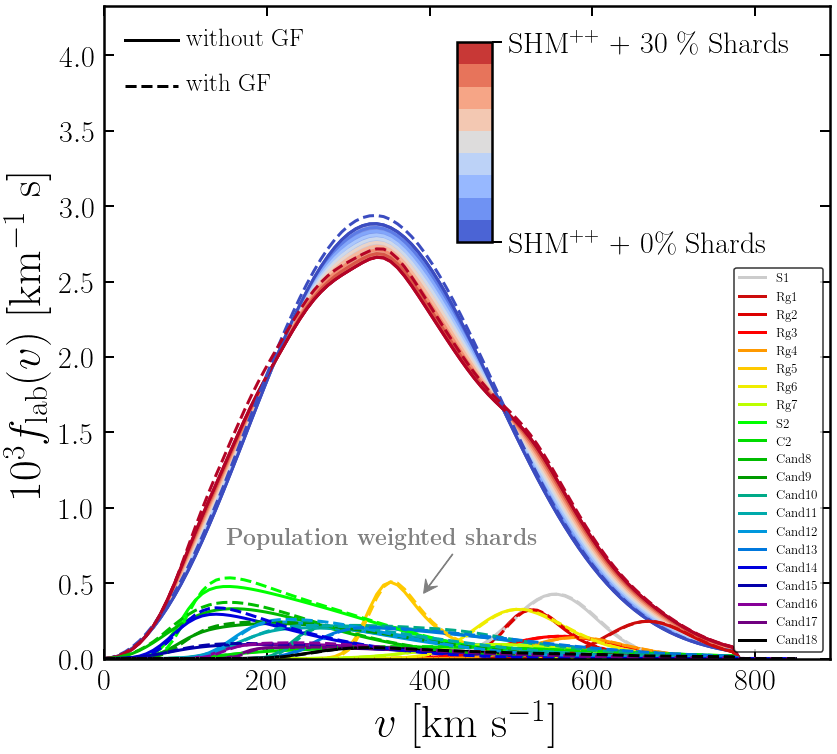

In [2]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_fv_GravFocus'

fv0 = fv_Iso

n_xi = 10
xi_vals = linspace(0,0.3,n_xi)
col = (cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm
y2 = 1e3*(xi_vals[-1]*sum(fv,0)+(1.0-xi_vals[-1])*fv0)
for i in range(0,n_xi):
    plt.fill_between(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),'-',color=col[i,:],linewidth=3)
    
cbar_max = r'SHM$^{++}$ + 30 \% Shards'
cbar_min = r'SHM$^{++}$ + 0\% Shards'
plt.plot(v,1e3*fv0,'-',color=col[0,:],linewidth=3)
plt.plot(v,y2,'-',color=col[-1,:],linewidth=3)

plt.plot(v,1e3*fv_Iso_gf,'--',color=col[0,:],linewidth=3)
plt.plot(v,1e3*(xi_vals[-1]*sum(fv_gf,0)+(1.0-xi_vals[-1])*fv_Iso_gf),'--',color=col[-1,:],linewidth=3)


# Plot individual streams
colstrs = flipud(cm.nipy_spectral(linspace(0.0,1.0,nshards)))
for i in range(0,nshards):
    plt.plot(v,1e3*fv[i,:],color=colstrs[i,:],linewidth=3,label=names[i])
for i in range(0,nshards):
    plt.plot(v,1e3*fv_gf[i,:],'--',color=colstrs[i,:],linewidth=3)
leg = plt.legend(loc='lower right',fontsize=13,edgecolor='k')
leg.get_frame().set_linewidth(1.5)
    
    
# second "legend"
plt.plot([25,90],[4.1,4.1], 'k-',linewidth=3)
plt.plot([25,90],[3.8,3.8], 'k--',linewidth=3)
plt.text(100,4.1-0.035,'without GF',fontsize=25)
plt.text(100,3.8-0.035,'with GF',fontsize=25)

# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=max(1e3*fv_Iso)*1.5)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"$v$ [km s$^{-1}$]",fontsize=45);
plt.ylabel(r"$10^3 f_{\rm lab}(v)$ [km$^{-1}$ s]",fontsize=45);
plt.text(150,0.75,r'\bf {Population weighted shards}',fontsize=23,color='gray')
plt.arrow(0.48, 0.16, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='gray',facecolor='gray')

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [ ]:
# DM params
A = 23
m_chi = 10.0
sigma_p = 1.0e-45

# Energy range
n = 5000
E_th = 2.0
E_max = 50.0
E = logspace(log(0.01),log10(E_max),n)
v_min = MinimumWIMPSpeed(E,A,m_chi)

# Loop over times
ndays = 365
days = linspace(0,365,ndays)
dR0 = zeros(shape=(ndays,n))
dR = zeros(shape=(ndays,n))
R = zeros(shape=ndays)
R0 = zeros(shape=ndays)
dR0_gf = zeros(shape=(ndays,n))
dR_gf = zeros(shape=(ndays,n))
R_gf = zeros(shape=ndays)
R0_gf = zeros(shape=ndays)
for i in range(0,ndays):
    gmin0 = gvmin_Isotropic(v_min,days[i])
    gmin0_gf = gvmin_Isotropic(v_min,days[i],GravFocus=True)
    gmin_sub = zeros(shape=shape(gmin0))
    gmin_sub_gf = zeros(shape=shape(gmin0))
    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        gmin_sub += pops[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s)
        gmin_sub_gf += pops[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s,GravFocus=True)
        #gmin_sub += pops[isub]*gvmin_Isotropic(v_min,days[i],sig=sqrt(sum(sig_s**2.0))/6.0,v_shift=v_s)
    dR[i,:] = diffRecoilRate_SI(E,gmin_sub,A,sigma_p,m_chi,rho_0=0.55)
    dR_gf[i,:] = diffRecoilRate_SI(E,gmin_sub_gf,A,sigma_p,m_chi,rho_0=0.55)
    dR0[i,:] = diffRecoilRate_SI(E,gmin0,A,sigma_p,m_chi,rho_0=0.55)
    dR0_gf[i,:] = diffRecoilRate_SI(E,gmin0_gf,A,sigma_p,m_chi,rho_0=0.55)
    R[i] = trapz(dR[i,(E>E_th)],E[E>E_th])
    R_gf[i] = trapz(dR[i,(E>E_th)],E[E>E_th])

    R0[i] = trapz(dR0[i,(E>E_th)],E[E>E_th])
    R0_gf[i] = trapz(dR0_gf[i,(E>E_th)],E[E>E_th])
    print i
    
Rdiff = zeros(shape=n)
Rdiff0 = zeros(shape=n)
Rdiff_gf = zeros(shape=n)
Rdiff0_gf = zeros(shape=n)
for i in range(0,n):
    Rdiff[i] = max(dR[:,i])-min(dR[:,i])
    Rdiff0[i] = max(dR0[:,i])-min(dR0[:,i])
    Rdiff_gf[i] = max(dR_gf[:,i])-min(dR_gf[:,i])
    Rdiff0_gf[i] = max(dR0_gf[:,i])-min(dR0_gf[:,i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


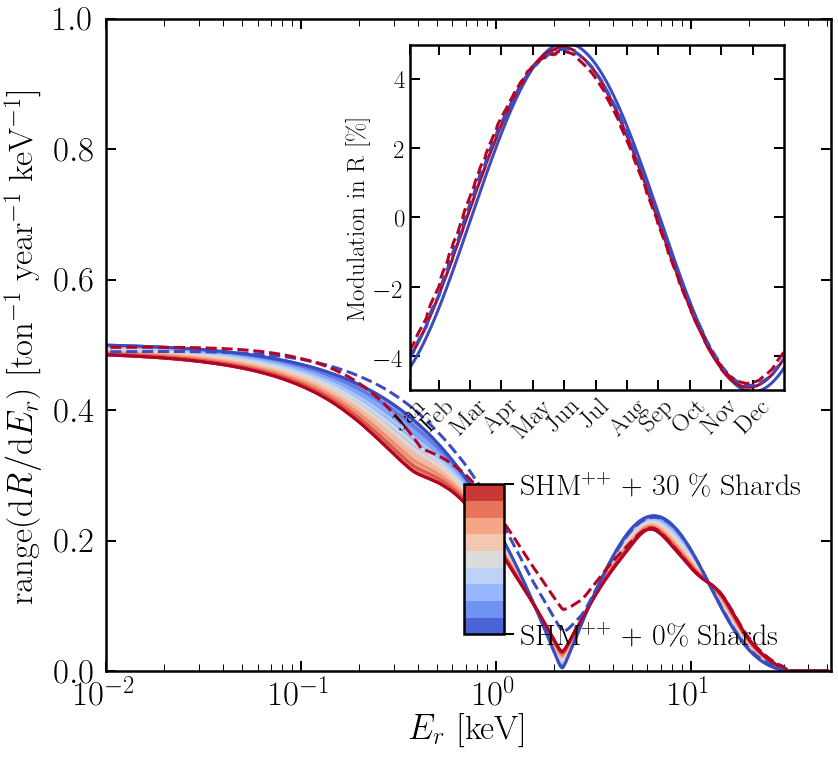

In [92]:
# Figure
pltname = 'Shards_annualmod_gravfocus'
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
left, bottom, width, height = [0.45, 0.45, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

col = (cm.coolwarm(linspace(0,1,n_xi)))

# Main plot
plt.sca(ax1)
y2 = xi_vals[-1]*Rdiff+(1-xi_vals[-1])*Rdiff0
y2_gf = xi_vals[-1]*Rdiff_gf+(1-xi_vals[-1])*Rdiff0_gf
for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,'-',color=col[i,:],linewidth=3)
    
plt.plot(E,Rdiff0,label=cbar_max,linewidth=3,color=col[0,:])
plt.plot(E,y2,label=cbar_min,linewidth=3,color=col[-1,:])

plt.plot(E,Rdiff0_gf,'--',label=cbar_max,linewidth=3,color=col[0,:])
plt.plot(E,y2_gf,'--',label=cbar_min,linewidth=3,color=col[-1,:])

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel(r"$E_r$ [keV]",fontsize=35);
plt.ylabel(r"range($\textrm{d}R/\textrm{d}E_r$) [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]" ,fontsize=35,labelpad=10);
ax1.set_xlim(left=0.01)
ax1.set_ylim(bottom=0.0,top=1.0)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax1.set_xscale('log')

# second "legend"
#ax1.plot([25,90],[4.1,4.1], 'k-',linewidth=3)
#ax1.plot([25,90],[3.8,3.8], 'k--',linewidth=3)
#ax1.text(100,4.1-0.035,'without GF',fontsize=25)
#ax1.text(100,3.8-0.035,'with GF',fontsize=25)





# Inset plot
plt.sca(ax2)
ymax = 5

R0mid = (max(R0)+min(R0))/2.0
Rmid = (max(R)+min(R))/2.0
R0mid_gf = (max(R0_gf)+min(R0_gf))/2.0
Rmid_gf = (max(R_gf)+min(R_gf))/2.0
y2 = 100*xi_vals[-1]*(R-Rmid)/Rmid+100*(1.0-xi_vals[-1])*(R0-R0mid)/R0mid
y2_gf = 100*xi_vals[-1]*(R_gf-Rmid_gf)/Rmid_gf+100*(1.0-xi_vals[-1])*(R0_gf-R0mid_gf)/R0mid_gf

#for i in range(0,n_xi):
    #dR = 100*xi_vals[i]*(R-Rmid)/Rmid+100*(1.0-xi_vals[i])*(R0-R0mid)/R0mid
    #plt.fill_between(days,dR,y2=y2,color=col[i,:],alpha=0.5)
    #plt.plot(days,dR,'-',color=col[i,:],linewidth=3)
plt.plot(days,100*(R0-R0mid)/R0mid,linewidth=3,color=col[0,:])
plt.plot(days,y2,linewidth=3,color=col[-1,:])
plt.plot(days,100*(R0_gf-R0mid_gf)/R0mid_gf,'--',linewidth=3,color=col[0,:])
plt.plot(days,y2_gf,'--',linewidth=3,color=col[-1,:])
#diffR = 100*(R0-R0mid)/R0mid
#plt.plot([days[argmax(diffR)],days[argmax(diffR)]],[-ymax,amax(diffR)],'--',color=col[0,:])
#plt.plot([days[argmax(y2)],days[argmax(y2)]],[-ymax,amax(y2)],'--',color=col[-1,:])

#diffR_gf = 100*(R0_gf-R0mid_gf)/R0mid_gf
#plt.plot([days[argmax(diffR_gf)],days[argmax(diffR_gf)]],[-ymax,amax(diffR_gf)],'--',color=col[0,:])
#plt.plot([days[argmax(y2_gf)],days[argmax(y2_gf)]],[-ymax,amax(y2_gf)],'--',color=col[-1,:])


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax2.set_xlim(left=0.0,right=365)
ax2.set_ylim(bottom=-ymax,top=ymax)
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
plt.ylabel(r"Modulation in R [\%]" ,fontsize=25);
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax2, width="20%", height="30%", bbox_to_anchor=[320, -200, 200, 500]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

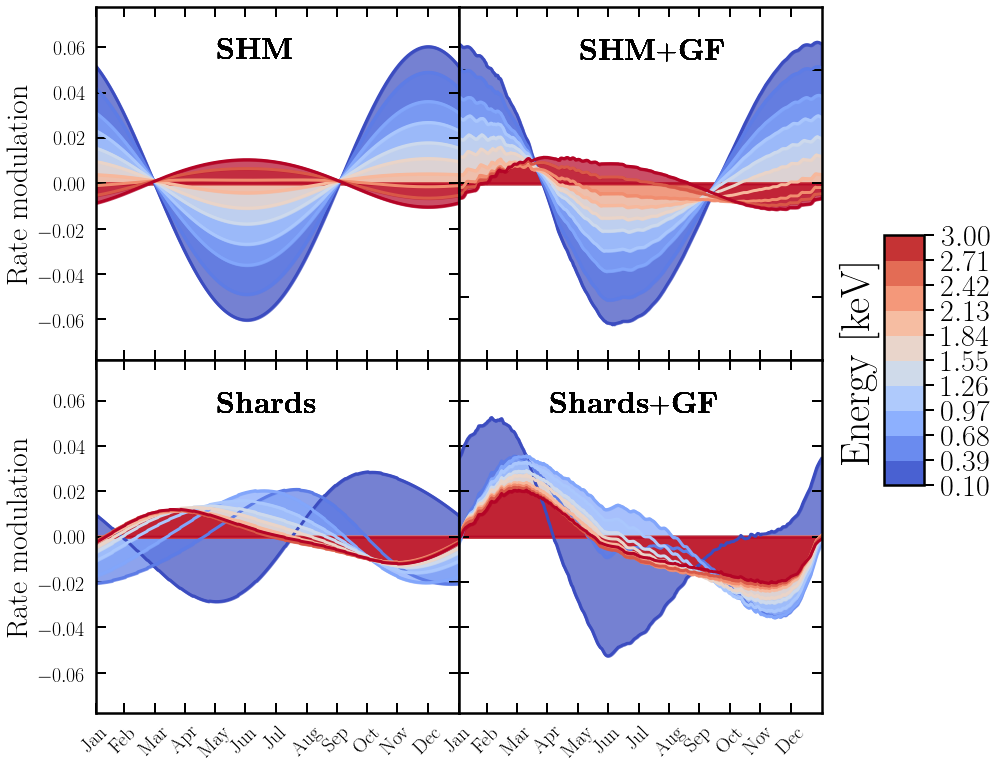

In [166]:
nbins = 10
bin_edges = linspace(0.1,3.0,nbins+1)

def bin_dR(fdR):
    Rbin = zeros(shape=(ndays,nbins))
    for i in range(0,ndays):
        for j in range(0,nbins):
            E1 = bin_edges[j]
            E2 = bin_edges[j+1]
            Ec = E[(E>E1)&(E<E2)]
            dRc = fdR[i,(E>E1)&(E<E2)]
            Rbin[i,j] = trapz(dRc,Ec)
    return Rbin

Rbin0 = bin_dR(dR0)
Rbin0_gf = bin_dR(dR0_gf)
Rbin = bin_dR(dR)
Rbin_gf = bin_dR(dR_gf)

# Set up subplots
fig, axarr = plt.subplots(2, 2,figsize=(13,13))
gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.0,wspace=0.0)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

ymax = 0.078
labelx = days[-1]/3.0
labely = 0.7*ymax

plt.sca(ax1)
colbins = (cm.coolwarm(linspace(0,1,nbins)))
for i in range(0,nbins):
    yc = Rbin0[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31)
    plt.text(labelx,labely,r'{\bf SHM}',fontsize=30)
        
plt.sca(ax2)
for i in range(0,nbins):
    yc = Rbin0_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31)
    plt.text(labelx,labely,r'{\bf SHM}+{\bf GF}',fontsize=30)

plt.sca(ax3)
for i in range(0,nbins):
    yc = Rbin[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
    plt.text(labelx,labely,r'{\bf Shards}',fontsize=30)

plt.sca(ax4)
for i in range(0,nbins):
    yc = Rbin_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])   
    plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
    plt.text(labelx-30,labely,r'{\bf Shards}+{\bf GF}',fontsize=30)

    
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax1.set_xlim([0,days[-1]])
ax2.set_xlim([0,days[-1]])
ax3.set_xlim([0,days[-1]])
ax4.set_xlim([0,days[-1]])
ax1.set_ylim([-ymax,ymax])
ax2.set_ylim([-ymax,ymax])
ax3.set_ylim([-ymax,ymax])
ax4.set_ylim([-ymax,ymax])

# Custom colorbar
cbaxes = inset_axes(ax2, width="20%", height="50%", bbox_to_anchor=[750, 100, 200, 500]) 
norm = mpl.colors.Normalize(vmin=bin_edges[0],vmax=bin_edges[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=bin_edges,boundaries=bin_edges,orientation='vertical')
f = plt.gcf().get_children()
cbar = f[5]
cbar.tick_params(labelsize=20) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7,labelsize=30)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
cbar.set_ylabel(r'Energy [keV]')
cbar.yaxis.label.set_size(40)
cbar.yaxis.set_label_position("left")

ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=20)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax2.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=20)
ax3.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax4.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=20)
ax4.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

ax1.set_ylabel('Rate modulation',fontsize=30)
ax3.set_ylabel('Rate modulation',fontsize=30)

plt.show()

In [24]:
plt.plot(Rbin[:,0])

(50,)